In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('M:/rahulpython/')

%matplotlib inline
pd.set_option('max_columns',None)

In [2]:
hr = pd.read_csv('human-resources-data-set/HRDataset_v9.csv')
cost = pd.read_csv('human-resources-data-set/recruiting_costs.csv')

In [3]:
hr.head(3)

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.5,MA,1450,11/24/1987,Female,Married,US Citizen,No,Black or African American,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.0,MA,1460,4/26/1984,Male,Divorced,US Citizen,No,Black or African American,01-06-2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.0,MA,2703,09-01-1986,Male,Single,US Citizen,No,White,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets


In [4]:
hr['Work_years'] = round(hr['Days Employed'] / 365,2)
hr[['Work_years']].describe()

,Work_years
count,310.000000
mean,3.550903
std,2.108245
min,0.010000
25%,2.102500
50%,3.390000
75%,4.745000
max,11.890000


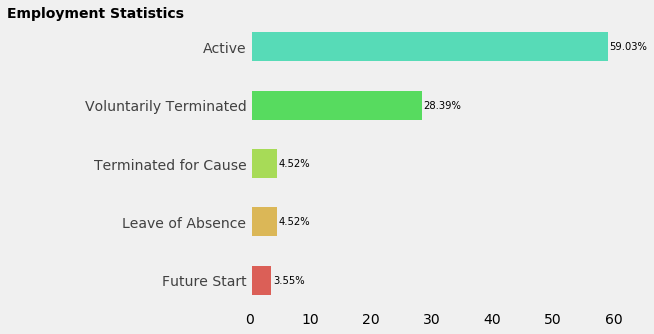

In [5]:
plot_df = ((hr['Employment Status'].value_counts()/hr.shape[0]).sort_values()*100).round(2)
plt.style.use('fivethirtyeight')
color = sns.color_palette('hls',9)
ax = plot_df.plot(kind='barh',color=color,figsize=(6,5))
for i,(a,b) in enumerate(zip(plot_df.index,plot_df.values)):
    plt.text(x=b+0.3,y=i,s=str(b)+'%',color='k',verticalalignment="center", horizontalalignment="left", size=10)

ax.set_yticklabels(labels=plot_df.index,color='#414141')
ax.text(x=-40,y=4.5,s='Employment Statistics',fontsize=14,fontweight='semibold')
ax.grid(False)
plt.show()

**Employment KPI**

 1). Number of full time employees form 63%.  
 2). Active employees form 59% of total work force.   
 3). There is a total job vaccancy of 33% caused by volunatarily termination and termination for cause.  
 4). New joiness fill up 3% of vaccancy.  
 5). Voluntary termination rate is 86%.  
 6). Involuntary termination rate is 14%.  
 7). Average tenure is 3.5 years.  
 


8). Diversity Rate:

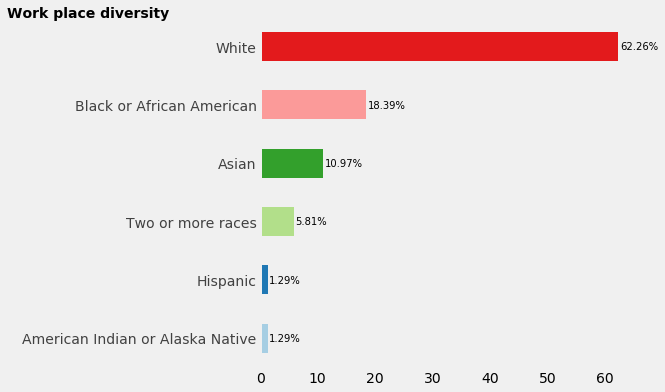

In [6]:
plot_df = ((hr['RaceDesc'].value_counts()/hr.shape[0]).sort_values()*100).round(2)
plt.style.use('fivethirtyeight')
color = sns.color_palette('Paired')
ax = plot_df.plot(kind='barh',color=color,figsize=(6,6))
for i,(a,b) in enumerate(zip(plot_df.index,plot_df.values)):
    plt.text(x=b+0.3,y=i,s=str(b)+'%',color='k',verticalalignment="center", horizontalalignment="left", size=10)

ax.set_yticklabels(labels=plot_df.index,color='#414141')
ax.text(x=-44,y=5.5,s='Work place diversity',fontsize=14,fontweight='semibold')
ax.grid(False)
plt.show()

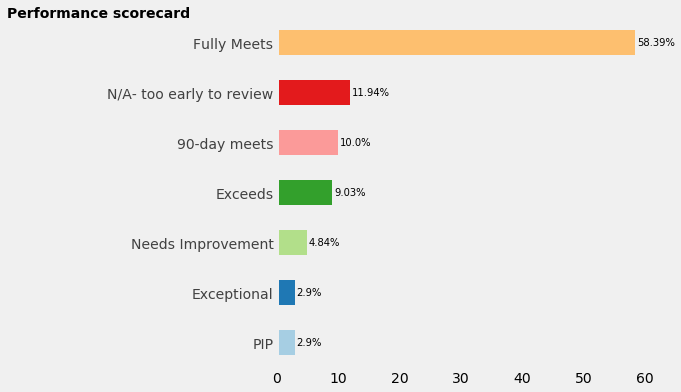

In [7]:
plot_df = ((hr['Performance Score'].value_counts()/hr.shape[0]).sort_values()*100).round(2)
plt.style.use('fivethirtyeight')
color = sns.color_palette('Paired')
ax = plot_df.plot(kind='barh',color=color,figsize=(6,6))
for i,(a,b) in enumerate(zip(plot_df.index,plot_df.values)):
    plt.text(x=b+0.3,y=i,s=str(b)+'%',color='k',verticalalignment="center", horizontalalignment="left", size=10)

ax.set_yticklabels(labels=plot_df.index,color='#414141')
ax.text(x=-44,y=6.5,s='Performance scorecard',fontsize=14,fontweight='semibold')
ax.grid(False)
plt.show()

In [8]:
plot_df = cost.sort_values(by='Total',ascending=False).set_index('Employment Source').T
col = sns.light_palette('green',as_cmap=True)
plot_df.style.background_gradient(cmap=col)

Employment Source,MBTA ads,Diversity Job Fair,Newspager/Magazine,Careerbuilder,On-campus Recruiting,Website Banner Ads,Billboard,Monster.com,Social Networks - Facebook Twitter etc,Search Engine - Google Bing Yahoo,Other,Pay Per Click - Google,Pay Per Click,Professional Society,Internet Search,Information Session,Glassdoor,Employee Referral,On-line Web application,Vendor Referral,Company Intranet - Partner,Word of Mouth
January,640,0,629,410,0,400,520,500,420,330,0,330,110,100,0,0,0,0,0,0,0,0
February,640,5129,510,410,0,400,520,500,481,410,492,330,110,100,0,0,0,0,0,0,0,0
March,640,0,293,410,2500,300,520,500,452,388,0,180,60,100,0,0,0,0,0,0,0,0
April,640,0,810,820,0,388,520,440,479,372,829,362,121,100,0,0,0,0,0,0,0,0
May,640,0,642,820,0,592,0,500,392,472,744,197,110,100,0,0,0,0,0,0,0,0
June,640,0,675,410,2500,610,0,500,508,412,0,152,109,100,0,0,0,0,0,0,0,0
July,640,0,707,410,0,620,612,440,578,416,610,389,130,100,0,0,0,0,0,0,0,0
August,1300,4892,740,820,0,669,612,500,466,495,0,437,146,100,0,0,0,0,0,0,0,0
September,1300,0,772,820,2500,718,729,440,389,619,0,315,105,100,0,0,0,0,0,0,0,0
October,1300,0,805,1230,0,767,749,440,439,502,510,327,109,100,0,0,0,0,0,0,0,0


**Performance KPI**

 1). A 59% of work force meets performance standards.   
 2). Percentage of workforce below performance standards(needs improvement + PIP) forms a total of 7%.    
 3). Internal job referral hires is 0%.  
 4). Top sources for job hires are through platforms like MBTA ads, Diversity job fair and Newspaper/Magazines.  
 
 

In [9]:
np.random.seed(25)
cmap = sns.diverging_palette(5, 10,as_cmap=True)

hr.groupby(['Manager Name','Employment Status'])[['Employment Status']].count() \
    .unstack().fillna(0).style.highlight_max(axis=1)